In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('empreinteCarboneMissions_2022121.tsv', sep='\t')
data = data.rename(columns={'Quantité' : 'N', 'Emission (kg eCO2)': 'em'})
data

,ID,Type,Mode de deplacement,N,Statut,Nombre de personne,Motif,Aller / Retour,Distance (km),em,Incertitude (kg eCO2)
0,"1,2,99,515,868,1015,1370,1639",MX,plane,8,NaN,1,NaN,OUI,79500,6591,659
1,"1,91,280,838,871,873,962,968,988,1190,1239,135...",NaN,train,15,NaN,1,NaN,OUI,21405,64,13
2,2,MX,plane,1,NaN,1,NaN,OUI,9511,788,79
3,2,NaN,plane,1,NaN,1,NaN,OUI,875,124,12
4,3,NaN,plane,1,NaN,1,NaN,OUI,1691,239,24
...,...,...,...,...,...,...,...,...,...,...,...
603,230,MX,plane,1,NaN,1,NaN,OUI,2169,222,22
604,231,NaN,car,1,NaN,1,NaN,OUI,291,68,41
605,232,NaN,car,1,NaN,1,NaN,OUI,291,68,41
606,233,NaN,train,1,NaN,1,NaN,OUI,2008,6,1


In [32]:
subdata = data.loc[:, ['N', 'em']]
subdata = subdata.loc[subdata['em'] > 0, :]
subdata = subdata.sort_values(by='em')
em = subdata['em'].values.copy()
N = subdata['N'].values.copy()
subdata

,N,em
314,1,1
400,1,1
65,1,1
124,1,1
408,1,1
...,...,...
147,7,13557
168,9,14081
74,19,29799
19,25,30624


In [33]:
dmin = float(em.min())
dmin

1.0

In [34]:
dmax = float(em.max())
dmax

52386.0

In [35]:
dmax = 60000
dmax

60000

In [36]:
step = 1000
bins = np.arange(0, dmax + step, step)
nbins = len(bins)
bins

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
       18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000,
       27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000,
       36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000,
       45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000,
       54000, 55000, 56000, 57000, 58000, 59000, 60000])

In [37]:
dl = np.diff(bins)[0]
dl

1000

In [38]:
index = np.digitize(em, bins, right=True)

In [39]:
outputs = np.zeros((len(bins) - 1), dtype=float)
for i in np.unique(index):
    iok = np.nonzero(index == i)[0]
    outputs[i - 1] = N[iok].sum()

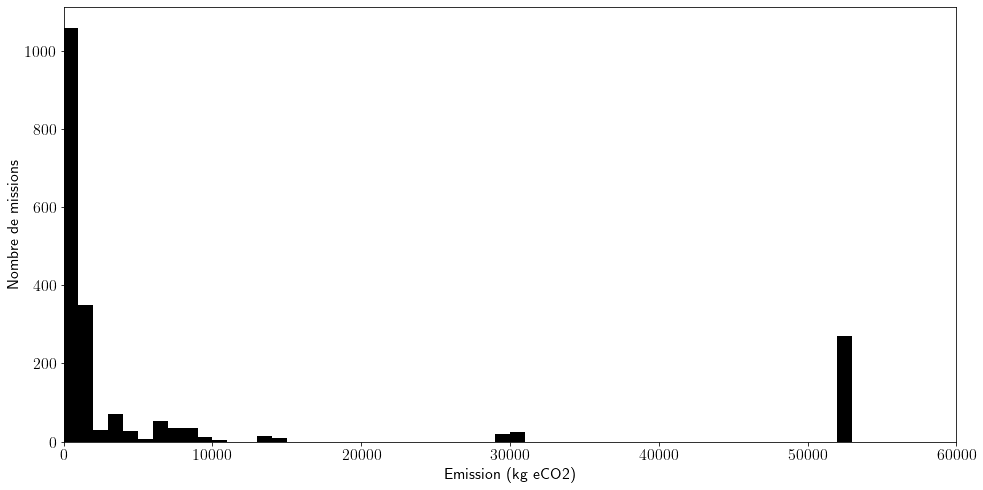

In [40]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=(16, 8))
plt.bar(bins[slice(0, nbins - 1)], outputs, width=dl, align='edge')
plt.xlabel('Emission (kg eCO2)')
plt.ylabel('Nombre de missions')
plt.xlim(0, dmax)
plt.savefig('number_missions_eco2.png', bbox_inches='tight')